In [31]:
import pandas as pd
pd.set_option('display.max_columns', 30)
from datetime import datetime
%matplotlib inline

In [32]:
df_visit_logs = pd.read_csv("../data/visit_log.csv")

In [33]:
df_visit_logs.head()

,browser,browser_version,current_url,device_description,end,host_ip,mac_address,max_packet_size,min_packet_size,network_interface,num_packets,num_tcp_connections,num_tcp_connections_http2,num_tcp_connections_to_website_tld,os_version,page_loaded,page_source_length,sslkeylog_exists,start,title,url,user_agent,visit_id,duration,page_load_duration,host,Browser,OS,Device,client_id
0,Chrome,67.0.3396.99,https://www.mayoclinic.org/es-es/diseases-cond...,vm,1.530823e+09,172.16.78.130,00:0c:29:09:93:21,1460,-1460,ens33,2274,37,18,2,Ubuntu 18.04 LTS,1.530823e+09,58122,True,1.530823e+09,Trastorno esquizoafectivo - Síntomas y causas ...,https://www.mayoclinic.org/es-es/diseases-cond...,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1530823113_428-00_0c_29_09_93_21,5.524876,2.490026,www.mayoclinic.org,Chrome (67.0.3396.99),Ubuntu 18.04 LTS,vm,5
1,Opera,67.0.3396.87,https://www.mayoclinic.org/es-es/diseases-cond...,vm,1.530823e+09,172.16.78.130,00:0c:29:09:93:21,1460,-1460,ens33,1860,39,17,2,Ubuntu 18.04 LTS,1.530823e+09,59436,True,1.530823e+09,Trastorno esquizoafectivo - Síntomas y causas ...,https://www.mayoclinic.org/es-es/diseases-cond...,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1530823123_376-00_0c_29_09_93_21,5.700306,2.664391,www.mayoclinic.org,Opera (67.0.3396.87),Ubuntu 18.04 LTS,vm,16
2,Firefox,61.0,https://www.mayoclinic.org/departments-centers...,vm,1.530823e+09,172.16.78.130,00:0c:29:09:93:21,1460,-1460,ens33,1208,21,7,1,Ubuntu 18.04 LTS,1.530823e+09,17681,True,1.530823e+09,Overview - Gastroenterologic and General Surge...,https://www.mayoclinic.org/departments-centers...,Mozilla/5.0 (X11; Linux x86_64; rv:61.0) Gecko...,1530823165_570-00_0c_29_09_93_21,4.065543,1.047601,www.mayoclinic.org,Firefox (61.0),Ubuntu 18.04 LTS,vm,10
3,Chrome,67.0.3396.99,https://www.mayoclinic.org/departments-centers...,vm,1.530823e+09,172.16.78.130,00:0c:29:09:93:21,1460,-833,ens33,576,14,6,2,Ubuntu 18.04 LTS,1.530823e+09,17675,True,1.530823e+09,Overview - Gastroenterologic and General Surge...,https://www.mayoclinic.org/departments-centers...,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1530823174_344-00_0c_29_09_93_21,3.687062,0.652608,www.mayoclinic.org,Chrome (67.0.3396.99),Ubuntu 18.04 LTS,vm,5
4,Opera,67.0.3396.87,https://www.mayoclinic.org/departments-centers...,vm,1.530823e+09,172.16.78.130,00:0c:29:09:93:21,1460,-850,ens33,651,15,6,2,Ubuntu 18.04 LTS,1.530823e+09,17675,True,1.530823e+09,Overview - Gastroenterologic and General Surge...,https://www.mayoclinic.org/departments-centers...,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1530823181_323-00_0c_29_09_93_21,3.746505,0.719918,www.mayoclinic.org,Opera (67.0.3396.87),Ubuntu 18.04 LTS,vm,16


In [34]:
df_visit_logs.browser.unique()

array(['Chrome', 'Opera', 'Firefox', 'IE', 'Safari', 'Edge'], dtype=object)

In [35]:
len(df_visit_logs)

186200

In [36]:
assert len(df_visit_logs.client_id.unique()) == 19
assert len(df_visit_logs.host.unique()) == 7
assert len(df_visit_logs.current_url.unique()) == 350
assert all(df_visit_logs.groupby(["client_id","url"]).size() == 28) #each URL was visited 28 times using each client

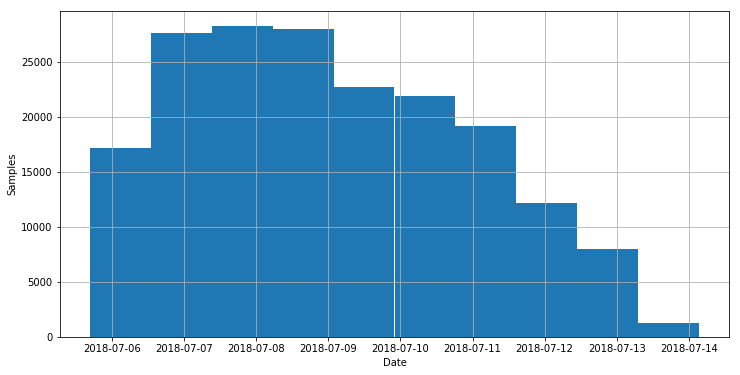

In [37]:
s = pd.Series(list(map(lambda x: datetime.fromtimestamp(x), df_visit_logs.start)))
ax = s.hist(figsize=(12,6))
ax.set_xlabel("Date")
ax.set_ylabel("Samples")

In [38]:
print("first and last sample timestamps:")
s.iloc[0], s.iloc[-1]

first and last sample timestamps:


(Timestamp('2018-07-05 16:38:36.512648'),
 Timestamp('2018-07-14 03:23:27.499484'))